In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, train_test_split
from statsmodels.formula.api import ols
from statsmodels.api import OLS
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
sns.set(font_scale=1.2)
from warnings import filterwarnings
filterwarnings('ignore')

# Problem 1: Linear Regression


You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

Dataset for Problem 1: cubic_zirconia.csv

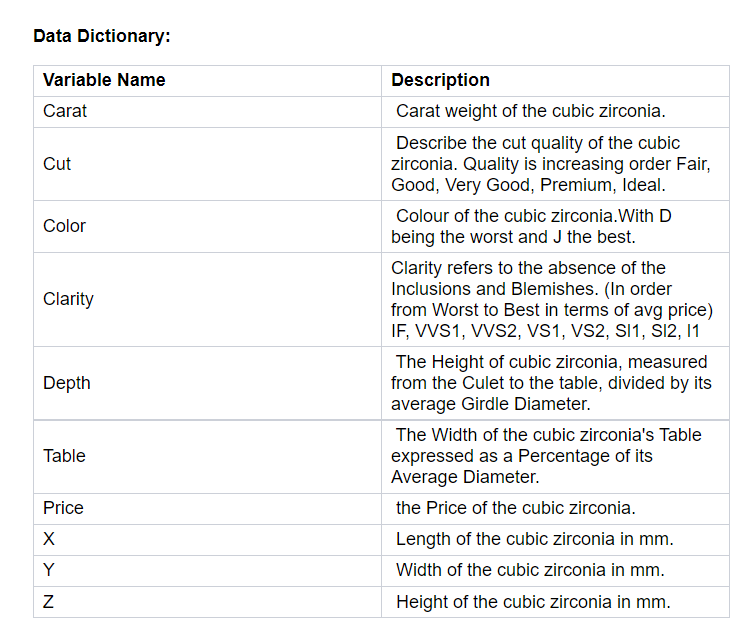

## 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

In [2]:
gem_df=pd.read_csv('cubic_zirconia.csv') #Reading the data
gem_df

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...,...
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [3]:
gem_df.head() # sample(top 5 rows) of the dataset

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
gem_df.tail() #bottom 5 rows of the dataset

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


The dataset is having 26967 rows and 11 columns.

In [5]:
gem_df.rename(columns={'Unnamed: 0':'index'},inplace=True) #Renaming 'Unnamed: 0' column to index 

In [6]:
gem_df.set_index('index',inplace=True) #setting index column as index of the data

In [7]:
gem_df.head() 

,carat,cut,color,clarity,depth,table,x,y,z,price
index,,,,,,,,,,
1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [8]:
gem_df

,carat,cut,color,clarity,depth,table,x,y,z,price
index,,,,,,,,,,
1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656


Now, the dataset is having 26967 rows and 10 columns.

In [9]:
gem_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26967 entries, 1 to 26967
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


In [10]:
gem_df.shape  #checking the shape of data

(26967, 10)

The feature depth has 697 null values, rest other features have no null values. Datatypes are correctly assigned that shows data doesn't have garbage values as well. The data consists of 11 features having 6 float datatype, 2 int datatype and 3 object datatype features.The data consists 26967 entries.2.58% null values are present in the data. The dataset consists 26967 rows and 11 columns, I have renamed the Unnamed: 0 to the index as a column.

### Exploratory data Analysis

In [11]:
gem_df.describe() # Describe the data

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [12]:
gem_df.describe(include='all')

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26967.000000,26967,26967,26967,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10816,5661,6571,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.798375,NaN,NaN,NaN,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,NaN,NaN,NaN,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000


In [13]:
gem_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26967.0,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270.0,NaN,NaN,NaN,61.745147,1.41286,50.8,61.0,61.8,62.5,73.6
table,26967.0,NaN,NaN,NaN,57.45608,2.232068,49.0,56.0,57.0,59.0,79.0
x,26967.0,NaN,NaN,NaN,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,NaN,NaN,NaN,5.733569,1.166058,0.0,4.71,5.71,6.54,58.9
z,26967.0,NaN,NaN,NaN,3.538057,0.720624,0.0,2.9,3.52,4.04,31.8
price,26967.0,NaN,NaN,NaN,3939.518115,4024.864666,326.0,945.0,2375.0,5360.0,18818.0


In [14]:
gem_df.isnull().sum() #Checking null values

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [15]:
round(gem_df.isnull().sum()/len(gem_df)*100,2) #Percentage of missing values

carat      0.00
cut        0.00
color      0.00
clarity    0.00
depth      2.58
table      0.00
x          0.00
y          0.00
z          0.00
price      0.00
dtype: float64

In [16]:
gem_df.isnull().sum().sum()/gem_df.shape[0]

0.025846404865205622

In [17]:
gem_df.duplicated().sum() #Checking Duplicates in the data

34

In [18]:
dups = gem_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 34


In [19]:
#gem_df.drop_duplicates(inplace=True)#dropping duplicates from the data

In [20]:
#gem_df.duplicated().sum()

In [21]:
#Unique values of categorical variables

for column in gem_df.columns:
    if gem_df[column].dtype == 'object':
        print(column.upper(),': ',gem_df[column].nunique())
        print(gem_df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




In [22]:
gem_df[['carat' ,'depth', 'table', 'x', 'y', 'z',
       'price']].nunique()

carat     257
depth     169
table     112
x         531
y         526
z         356
price    8742
dtype: int64

## Univariate & Bivariate Analysis

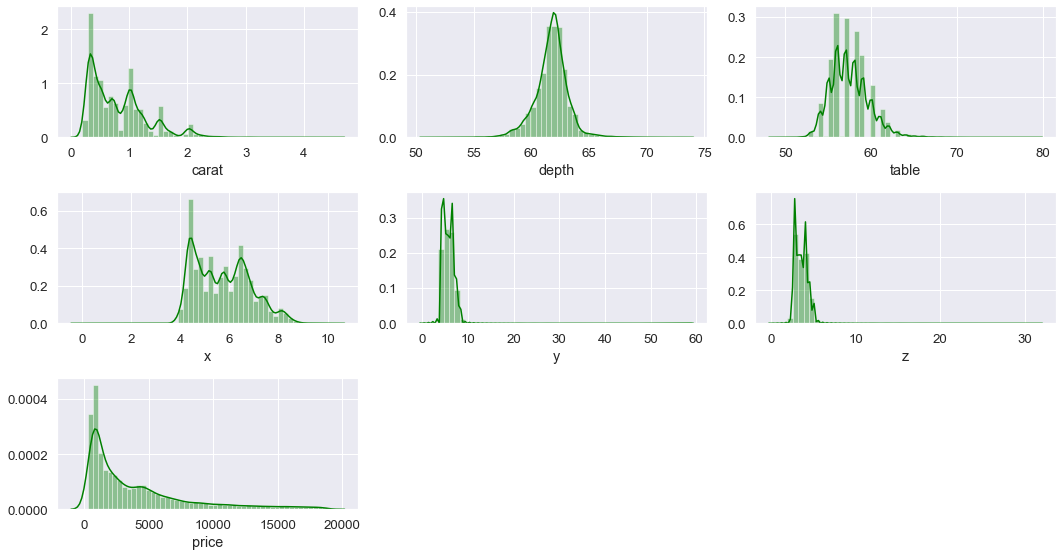

In [23]:
plt.figure(figsize=(15,10))
for i, col in enumerate(gem_df.select_dtypes(exclude='object').columns):
        plt.subplot(4,3, i+1)
        sns.distplot(gem_df[col], color='green')
        plt.tight_layout()
        plt.savefig('Distplot_gemstone.png')

There are multiple clusters evident in Carat, table, X,Y and Z as multiple peaks are present.
Most of the continuous features are normal but have multiple peaks while Y and Z seems to be not normal.
Only depth and Price dont have multiple clusters and are normally distributed and price is slightly right skewed.

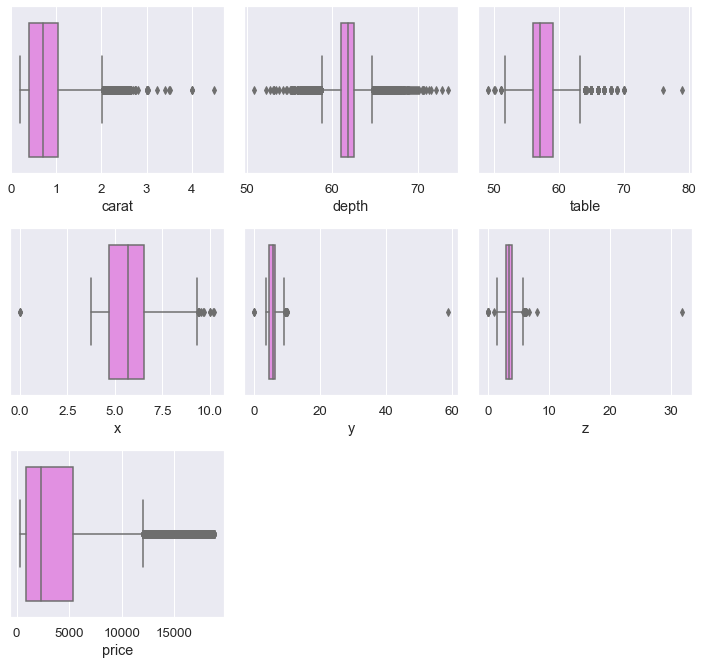

In [24]:
plt.figure(figsize=(10,12))
for i, col in enumerate(gem_df.select_dtypes(exclude='object').columns):
        plt.subplot(4,3, i+1)
        sns.boxplot(data= gem_df, x = col, color= 'violet')
        plt.tight_layout()
        plt.savefig('Boxplot_gemstone.png')

All the continuous variables have outliers.
Since the outliers are continuous so they seem to be genuine thus treating them may distort the outcome of regression.

In [25]:
gem_df.skew() #skewness

carat    1.116481
depth   -0.028618
table    0.765758
x        0.387986
y        3.850189
z        2.568257
price    1.618550
dtype: float64

In [26]:
from scipy.stats import probplot

((array([-4.04913901, -3.83653887, -3.72035344, ...,  3.72035344,
          3.83653887,  4.04913901]),
  array([ 0.  ,  0.  ,  0.  , ...,  6.72,  8.06, 31.8 ])),
 (0.6878855999754362, 3.5380572551637193, 0.9544486377952857))

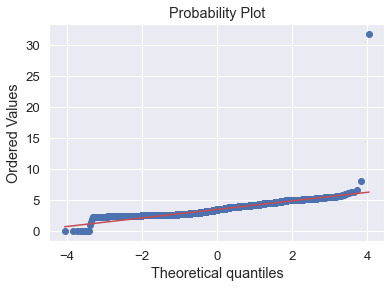

In [27]:
probplot(gem_df.z,plot=plt)

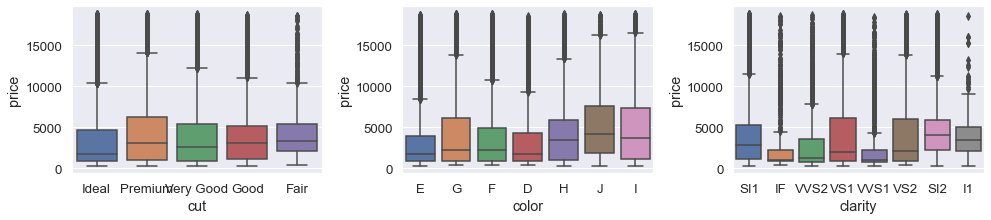

In [28]:
plt.figure(figsize=(14,12))
for i, col in enumerate(gem_df.select_dtypes(include='object').columns):
        plt.subplot(4,3, i+1)
        sns.boxplot(data= gem_df, x = col, y = 'price')
        plt.tight_layout()
        plt.savefig('bivariate_gemstone.png')

H, I, J colored diamonds are costlier ones.
SI2 and I1 clarity level diamonds are expensive.

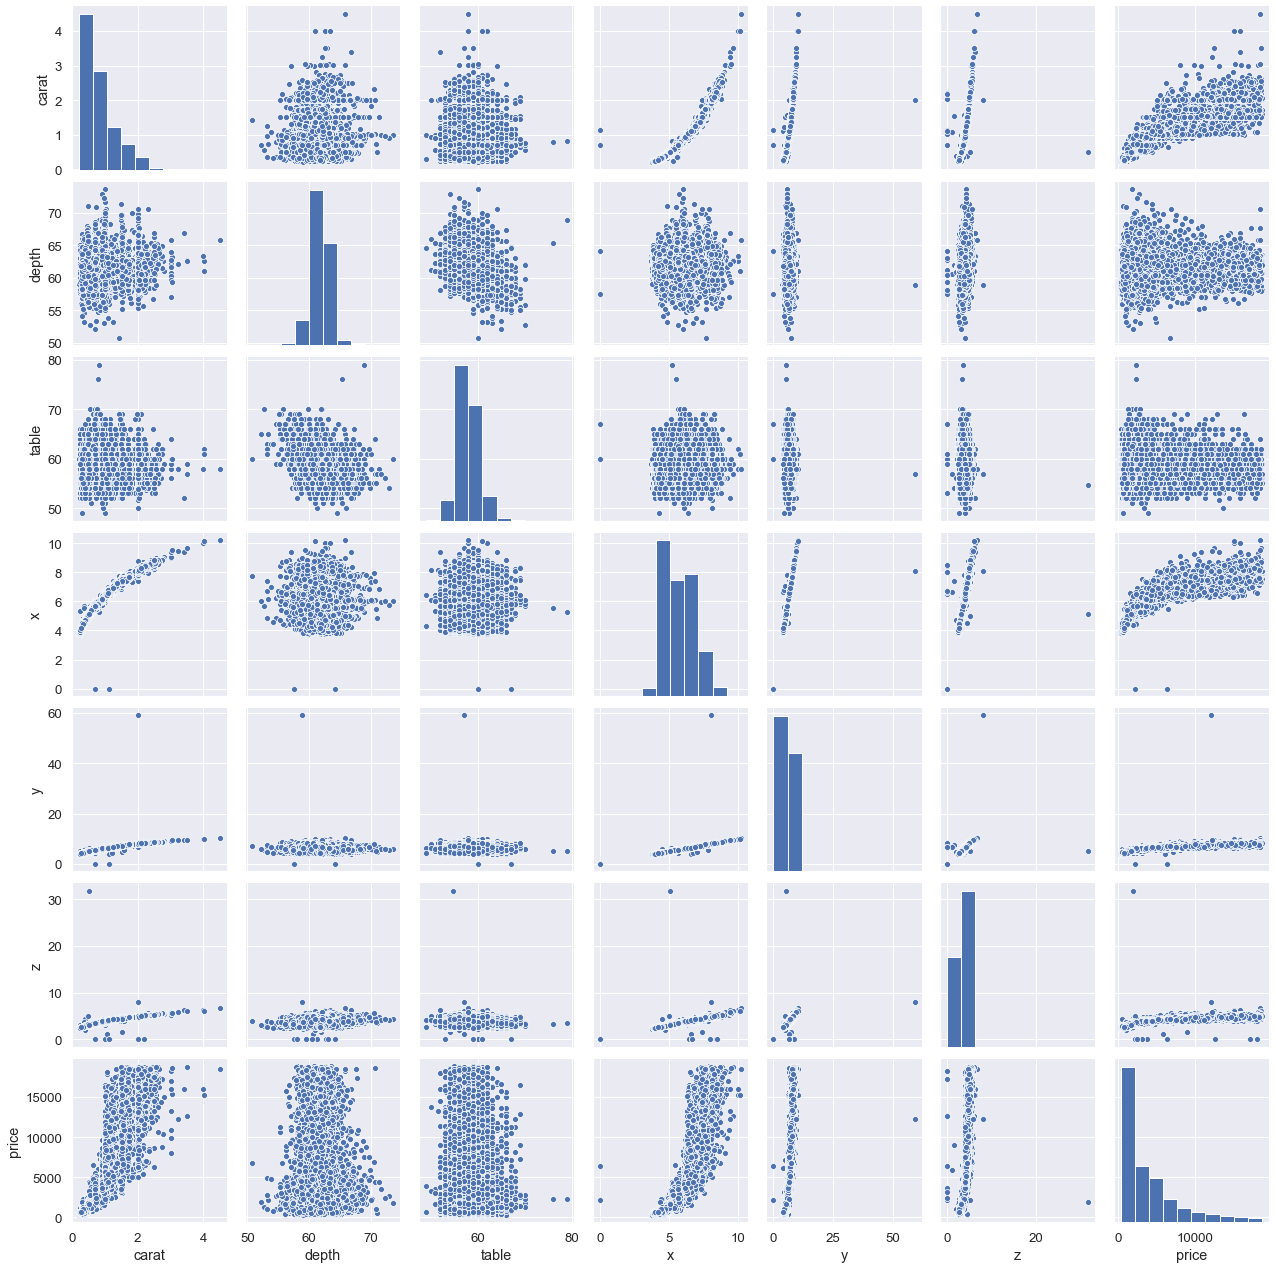

In [29]:
sns.pairplot(gem_df)
plt.savefig('paiplot_gemstone.png')

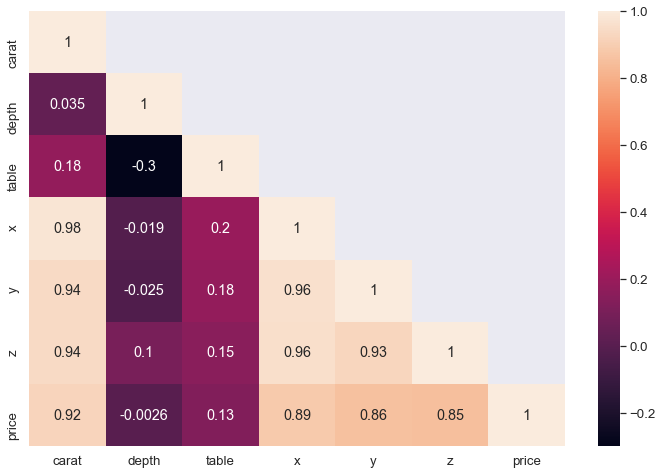

In [30]:
plt.figure(figsize=(12,8))
corr = gem_df.corr()
msk = np.triu(corr,+1)
sns.heatmap(corr, mask=msk, annot=True)
plt.savefig('heatmap_gemstone.png')

 Price has high correlation with carat, X, Y, Z.
 
 X, Y, Z also have high correlation with each other as well.
 It seems that Price is highly dependent over X, Y and Z

## 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

In [31]:
gem_df.groupby('clarity')['price'].median().sort_values(ascending=True)

clarity
IF      1063.5
VVS1    1066.0
VVS2    1253.0
VS1     1949.0
VS2     2066.0
SI1     2799.0
I1      3459.0
SI2     4077.0
Name: price, dtype: float64

#### combining clarity category

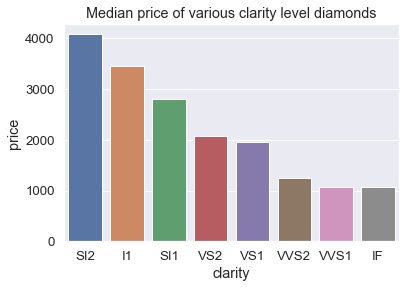

In [32]:
sns.barplot(data=gem_df, x= 'clarity', y= 'price', estimator=np.median,
            order=gem_df.groupby('clarity').price.median().sort_values(ascending=False).index, ci=0)
plt.title('Median price of various clarity level diamonds')
plt.savefig('Median_price_diamond.png')

Here in median price of various clarity level diamonds, we can see SI2 is the most expensive vs IF is the least expensive one.

we can categorise the various levels of clarity in 3 categories low, medium and high based on median price 1000-2000, 2000-3000 and more than 3000 respectively.

IF, WS1, WS2- low clarity diamonds

VS1, VS2, and SI1 - medium clarity diamonds

I1, SI2- high clarity diamonds.

#### combining color category

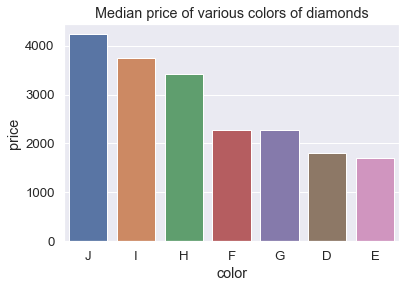

In [33]:
sns.barplot(data=gem_df, x= 'color', y= 'price', estimator=np.median,
            order=gem_df.groupby('color').price.median().sort_values(ascending=False).index, ci=0)
plt.title('Median price of various colors of diamonds')
plt.savefig('Median_price_color_diamond.png')

Here, in median price of various colors of diamonds we can see J is the most expensive while E is the least expensive one whereas the data dictionary confirms D being the worst color for diamonds.

we can categorise the various colors in 4 categories low, medium, high and premium based on median price 1000-2000, 2000-3000, 3000-4000 and respectively.

D and E - low quality.

F and G - medium qulity color.

H and I - high quality color.

J - premium quality color.

#### combining cut category

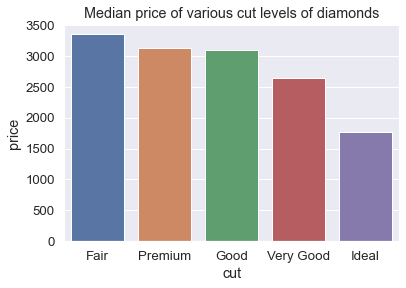

In [34]:
sns.barplot(data=gem_df, x= 'cut', y= 'price', estimator=np.median,
            order=gem_df.groupby('cut').price.median().sort_values(ascending=False).index, ci=0)
plt.title('Median price of various cut levels of diamonds')
plt.savefig('Median_price_cut_diamond.png')

Here in median price of various cut levels of diamonds we can see Fair cut diamond is the most expensive while ideal cut is the least expensive one.

The data dictionary confirms Ideal being the best cut while the decreasing order for quality of cut is Ideal, Premium, Very Good, Good and Fair but the same is not confirmed by the data as it shows the decreasing order of cut as Fair, Premium, Good, Very Good and Ideal.

Though this order is not confirmed by the analysis but will follow as given by the business stake holder.

Text(0.5, 1.0, 'Revenue of various cut levels of diamonds')

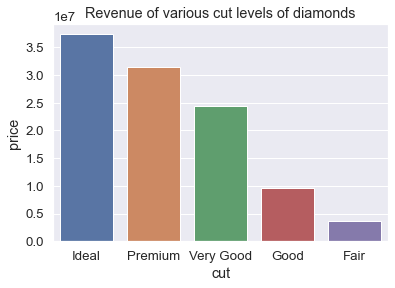

In [35]:
sns.barplot(data=gem_df, x= 'cut', y= 'price', estimator=np.sum,
            order=gem_df.groupby('cut').price.sum().sort_values(ascending=False).index, ci=0)
plt.title('Revenue of various cut levels of diamonds')

In [36]:
gem_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26967 entries, 1 to 26967
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


In [37]:
gem_df.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
index,,,,,,,,,,
1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
9,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407


In [38]:
gem_df.clarity = gem_df.clarity.replace(['IF', 'VVS1', 'VVS2'], 'low_clarity')
gem_df.clarity = gem_df.clarity.replace(['VS1', 'VS2', 'SI1'], 'medium_clarity')
gem_df.clarity = gem_df.clarity.replace(['I1', 'SI2'], 'high_clarity')

gem_df.color = gem_df.color.replace(['E', 'D'], 'low_quality')
gem_df.color = gem_df.color.replace(['G', 'F'], 'medium_quality')
gem_df.color = gem_df.color.replace(['I', 'H'], 'high_quality')
gem_df.color = gem_df.color.replace('J', 'premium_quality')

gem_df.cut = gem_df.cut.replace(['Fair', 'Good', 'Very Good'], 'average_cut')
gem_df.cut = gem_df.cut .replace(['Premium', 'Ideal'], 'precision_cut')

In [39]:
gem_df.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
index,,,,,,,,,,
1,0.30,precision_cut,low_quality,medium_clarity,62.1,58.0,4.27,4.29,2.66,499
2,0.33,precision_cut,medium_quality,low_clarity,60.8,58.0,4.42,4.46,2.70,984
3,0.90,average_cut,low_quality,low_clarity,62.2,60.0,6.04,6.12,3.78,6289
4,0.42,precision_cut,medium_quality,medium_clarity,61.6,56.0,4.82,4.80,2.96,1082
5,0.31,precision_cut,medium_quality,low_clarity,60.4,59.0,4.35,4.43,2.65,779
6,1.02,precision_cut,low_quality,medium_clarity,61.5,56.0,6.46,6.49,3.99,9502
7,1.01,average_cut,high_quality,medium_clarity,63.7,60.0,6.35,6.30,4.03,4836
8,0.50,precision_cut,low_quality,medium_clarity,61.5,62.0,5.09,5.06,3.12,1415
9,1.21,average_cut,high_quality,medium_clarity,63.8,64.0,6.72,6.63,4.26,5407


In [40]:
#encoding null values

gem_df.clarity = gem_df.clarity.replace(['low_clarity', 'medium_clarity', 'high_clarity'], [0,1,2])
gem_df.color = gem_df.color.replace(['low_quality', 'medium_quality', 'high_quality', 'premium_quality'], [0,1,2,3])
gem_df.cut = gem_df.cut.replace(['average_cut', 'precision_cut'], [0,1])

In [41]:
gem_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26967 entries, 1 to 26967
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  int64  
 2   color    26967 non-null  int64  
 3   clarity  26967 non-null  int64  
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 3.3 MB


In [42]:
gem_df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [43]:
# imputing null values

gem_df = gem_df.fillna(gem_df.median())
gem_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [44]:
for i, col in enumerate(gem_df.columns): # checking for zeros in predictor variables.
    print(gem_df[col][gem_df[col]==0], '\n')

Series([], Name: carat, dtype: float64) 

index
3        0
7        0
9        0
13       0
15       0
        ..
26955    0
26956    0
26960    0
26961    0
26966    0
Name: cut, Length: 9252, dtype: int64 

index
1        0
3        0
6        0
8        0
11       0
        ..
26957    0
26959    0
26960    0
26961    0
26965    0
Name: color, Length: 8261, dtype: int64 

index
2        0
3        0
5        0
21       0
32       0
        ..
26952    0
26955    0
26962    0
26964    0
26966    0
Name: clarity, Length: 5264, dtype: int64 

Series([], Name: depth, dtype: float64) 

Series([], Name: table, dtype: float64) 

index
5822     0.0
6216     0.0
17507    0.0
Name: x, dtype: float64 

index
5822     0.0
6216     0.0
17507    0.0
Name: y, dtype: float64 

index
5822     0.0
6035     0.0
6216     0.0
10828    0.0
12499    0.0
12690    0.0
17507    0.0
18195    0.0
23759    0.0
Name: z, dtype: float64 

Series([], Name: price, dtype: int64) 



In [45]:
gem_df[gem_df.x==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
index,,,,,,,,,,
5822,0.71,0,1,2,64.1,60.0,0.0,0.0,0.0,2130
6216,0.71,0,1,2,64.1,60.0,0.0,0.0,0.0,2130
17507,1.14,0,1,1,57.5,67.0,0.0,0.0,0.0,6381


In [46]:
gem_df[gem_df.y==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
index,,,,,,,,,,
5822,0.71,0,1,2,64.1,60.0,0.0,0.0,0.0,2130
6216,0.71,0,1,2,64.1,60.0,0.0,0.0,0.0,2130
17507,1.14,0,1,1,57.5,67.0,0.0,0.0,0.0,6381


In [47]:
gem_df[gem_df.z==0] # found zeros values in the predictor variables

,carat,cut,color,clarity,depth,table,x,y,z,price
index,,,,,,,,,,
5822,0.71,0,1,2,64.1,60.0,0.00,0.00,0.0,2130
6035,2.02,1,2,1,62.7,53.0,8.02,7.95,0.0,18207
6216,0.71,0,1,2,64.1,60.0,0.00,0.00,0.0,2130
10828,2.20,1,2,1,61.2,59.0,8.42,8.37,0.0,17265
12499,2.18,1,2,2,59.4,61.0,8.49,8.45,0.0,12631
12690,1.10,1,1,2,63.0,59.0,6.50,6.47,0.0,3696
17507,1.14,0,1,1,57.5,67.0,0.00,0.00,0.0,6381
18195,1.01,1,2,2,58.1,59.0,6.66,6.60,0.0,3167
23759,1.12,1,1,2,60.4,59.0,6.71,6.67,0.0,2383


we can see that there are 9 rows having 0 in x, y, z columns, it is sure that these are garbage value which we should remove.

In [48]:
gem_df.drop(gem_df[gem_df.z==0].index, axis=0, inplace=True)

In [49]:
gem_df

,carat,cut,color,clarity,depth,table,x,y,z,price
index,,,,,,,,,,
1,0.30,1,0,1,62.1,58.0,4.27,4.29,2.66,499
2,0.33,1,1,0,60.8,58.0,4.42,4.46,2.70,984
3,0.90,0,0,0,62.2,60.0,6.04,6.12,3.78,6289
4,0.42,1,1,1,61.6,56.0,4.82,4.80,2.96,1082
5,0.31,1,1,0,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26963,1.11,1,1,1,62.3,58.0,6.61,6.52,4.09,5408
26964,0.33,1,2,0,61.9,55.0,4.44,4.42,2.74,1114
26965,0.51,1,0,1,61.7,58.0,5.12,5.15,3.17,1656


<AxesSubplot:xlabel='z'>

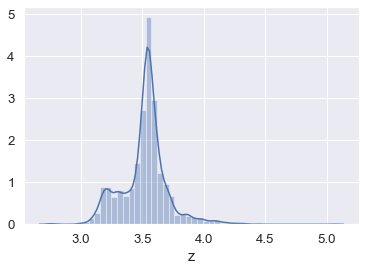

In [50]:
sns.distplot(gem_df[(gem_df.price>2000) & (gem_df.price<3000)]['z'])

In [51]:
gem_df.mean()

carat         0.798190
cut           0.656911
color         1.055420
clarity       0.987759
depth        61.746758
table        57.455342
x             5.730105
y             5.733832
z             3.539238
price      3938.311262
dtype: float64

In [52]:
gem_df[gem_df.depth==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
index,,,,,,,,,,


In [53]:
gem_df[gem_df.table==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
index,,,,,,,,,,


In [54]:
gem_df[gem_df.carat==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
index,,,,,,,,,,


## 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [55]:
#I have already encoaded the data, proceeding with the Modelling.

### Liner Regression

In [56]:
X = gem_df.drop('price', axis=1)
y = gem_df[['price']]
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.3, random_state= 1)

In [57]:
X_train.shape, X_test.shape

((18870, 9), (8088, 9))

In [58]:
train_labels.shape, test_labels.shape

((18870, 1), (8088, 1))

In [59]:
lr = LinearRegression()
lr.fit(X_train, train_labels)

LinearRegression()

In [60]:
lr.score(X_train, train_labels) # R-squared value for training data

0.9063616902769321

In [61]:
lr.score(X_test, test_labels) # R-squared value for testing data

0.8985176726004975

In [62]:
a = pd.DataFrame(lr.predict(X_train), columns= ['y_train_pred'] )

In [63]:
a = pd.concat([train_labels.reset_index().drop('index', axis=1),a], axis=1)
a

,price,y_train_pred
0,2768,2790.822838
1,544,246.246691
2,2351,1880.600033
3,1080,1150.149597
4,8901,10916.208747
...,...,...
18865,2792,4348.959030
18866,2208,2856.232494
18867,17688,14414.768401
18868,4480,5735.268906


In [64]:
pd.DataFrame(lr.predict(X_train))

,0
0,2790.822838
1,246.246691
2,1880.600033
3,1150.149597
4,10916.208747
...,...
18865,4348.959030
18866,2856.232494
18867,14414.768401
18868,5735.268906


In [65]:
np.sqrt(mean_squared_error(test_labels.price, lr.predict(X_test))) # Mean square root error for Testing.

1308.808548059965

In [66]:
np.sqrt(mean_squared_error(train_labels.price, lr.predict(X_train))) # Mean square root error for Training.

1219.7322693531626

In [67]:
lr.intercept_ # intercept

array([14449.49151293])

In [68]:
pd.DataFrame(lr.coef_, columns=X_train.columns, index = ['Coeff']).T

,Coeff
carat,11188.770183
cut,160.599585
color,-588.092345
clarity,-1229.145524
depth,-132.805692
table,-58.465831
x,-1064.761268
y,14.445782
z,-37.764764


#### ols_model

In [69]:
X = gem_df.drop('price', axis=1)
y = gem_df[['price']]
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.3, random_state= 1)

In [70]:
data = pd.concat([X_train, train_labels], axis=1)

In [71]:
formula = 'price~ carat + cut + color + clarity + depth + table + x + y + z'

In [72]:
ols_model = ols(formula, data).fit()

In [73]:
ols_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:              OLS              Adj. R-squared:     0.906      
Dependent Variable: price            AIC:                321765.7729
Date:               2021-12-19 20:52 BIC:                321844.2262
No. Observations:   18870            Log-Likelihood:     -1.6087e+05
Df Model:           9                F-statistic:        2.028e+04  
Df Residuals:       18860            Prob (F-statistic): 0.00       
R-squared:          0.906            Scale:              1.4885e+06 
--------------------------------------------------------------------
             Coef.    Std.Err.    t     P>|t|    [0.025     0.975]  
--------------------------------------------------------------------
Intercept  14449.4915 660.3446  21.8817 0.0000 13155.1569 15743.8262
carat      11188.7702  93.0459 120.2500 0.0000 11006.3918 11371.1486
cut          160.5996  20.3344   7.8979 0.0000   120.7423   200.4568
color       -588.0923  10.6485 -55.2276 0.0000  -608.9644  -567.2203
clarity    -1229.1455  15.7531 -78.0259 0.0000 -1260.0229 -1198.2681
depth       -132.8057   7.7006 -17.2462 0.0000  -147.8995  -117.7119
table        -58.4658   4.5423 -12.8713 0.0000   -67.3692   -49.5625
x          -1064.7613  50.5904 -21.0467 0.0000 -1163.9229  -965.5996
y             14.4458  23.9131   0.6041 0.5458   -32.4260    61.3176
z            -37.7648  41.9097  -0.9011 0.3675  -119.9115    44.3819
--------------------------------------------------------------------
Omnibus:             4294.619      Durbin-Watson:         1.985     
Prob(Omnibus):       0.000         Jarque-Bera (JB):      226564.551
Skew:                0.058         Prob(JB):              0.000     
Kurtosis:            19.975        Condition No.:         6322      
====================================================================
* The condition number is large (6e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

y and z variables seem to have insignification for determining the price as pvalue is very high for the alpha level 0.05% so we can conclude that we fail to reject null hypothesis that says y and z have no relation with price.
Thus we can remove y and z variables and make new model and check the validations and various parameters.

In [74]:
ols_model.rsquared

0.9063616902769321

In [75]:
ols_model.rsquared_adj

0.906317006035813

In [76]:
X_train

,carat,cut,color,clarity,depth,table,x,y,z
index,,,,,,,,,
7599,0.71,0,1,1,63.3,59.0,5.52,5.61,3.52
8883,0.30,0,0,1,62.9,58.0,4.27,4.31,2.70
22764,0.70,0,2,1,63.9,59.0,5.64,5.60,3.59
6644,0.36,1,0,1,60.2,56.0,4.65,4.62,2.79
18702,1.66,0,2,1,63.0,57.0,7.45,7.50,4.71
...,...,...,...,...,...,...,...,...,...
10960,0.76,1,2,0,59.6,57.0,5.91,5.86,3.51
17296,0.51,1,1,0,61.4,54.0,5.18,5.24,3.20
5193,2.01,1,0,2,62.2,57.0,8.04,8.09,5.02


In [77]:
np.sqrt(mean_squared_error(train_labels, ols_model.predict(data)))

1219.7322693531626

In [78]:
np.sqrt(mean_squared_error(test_labels, ols_model.predict(X_test)))

1308.8085480599657

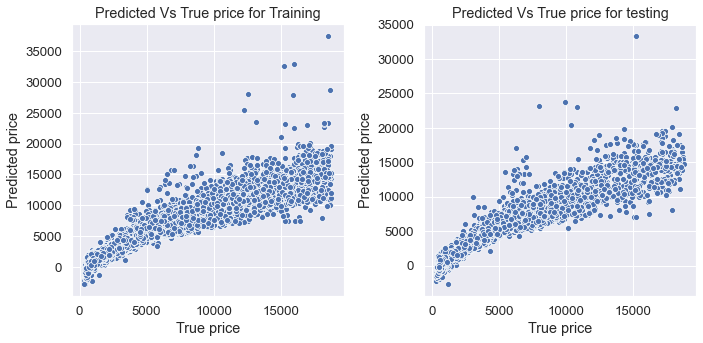

In [79]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(train_labels.price ,ols_model.predict(X_train)) # pred vs true
plt.title('Predicted Vs True price for Training')
plt.ylabel('Predicted price')
plt.xlabel('True price')


plt.subplot(1,2,2)
sns.scatterplot(test_labels.price ,ols_model.predict(X_test)) # pred vs true
plt.title('Predicted Vs True price for testing')
plt.ylabel('Predicted price')
plt.xlabel('True price')


plt.tight_layout()

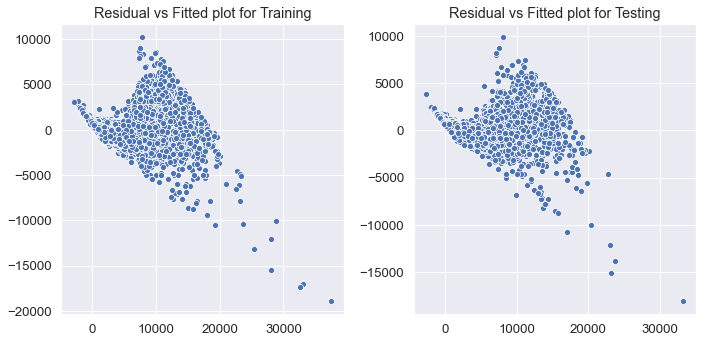

In [80]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(ols_model.predict(X_train), train_labels.price - ols_model.predict(X_train) ) # residual vs fitted
plt.title('Residual vs Fitted plot for Training')

plt.subplot(1,2,2)
sns.scatterplot(ols_model.predict(X_test), test_labels.price - ols_model.predict(X_test) ) # residual vs fitted
plt.title('Residual vs Fitted plot for Testing')
plt.tight_layout()

In [81]:
a =train_labels.price - ols_model.predict(X_train)
b= ols_model.predict(X_train)
c = train_labels.price
d= pd.concat([a,b,c], axis=1)

In [82]:
d.rename(columns = {0:'residual', 1:'y_train_pred_mod2', 'price': 'y_train_true'}, inplace=True)

In [83]:
d.corr()

,residual,y_train_pred_mod2,y_train_true
residual,1.000000e+00,2.399818e-16,0.306004
y_train_pred_mod2,2.399818e-16,1.000000e+00,0.952030
y_train_true,3.060038e-01,9.520303e-01,1.000000


In [84]:
ols_model.predict(X_train)

index
7599      2790.822838
8883       246.246691
22764     1880.600033
6644      1150.149597
18702    10916.208747
             ...     
10960     4348.959030
17296     2856.232494
5193     14414.768401
12177     5735.268906
236       7986.575374
Length: 18870, dtype: float64

In [85]:
lr.score(X_train, train_labels)

0.9063616902769321

In [86]:
ols_model.rsquared

0.9063616902769321

In [87]:
formula

'price~ carat + cut + color + clarity + depth + table + x + y + z'

In [88]:
#model3
formula2 = 'price~ carat + cut + color + clarity + depth + table + x'
model3 = ols(formula2, data).fit()

In [89]:
model3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:              OLS              Adj. R-squared:     0.906      
Dependent Variable: price            AIC:                321762.8329
Date:               2021-12-19 20:52 BIC:                321825.5955
No. Observations:   18870            Log-Likelihood:     -1.6087e+05
Df Model:           7                F-statistic:        2.608e+04  
Df Residuals:       18862            Prob (F-statistic): 0.00       
R-squared:          0.906            Scale:              1.4885e+06 
--------------------------------------------------------------------
             Coef.    Std.Err.    t     P>|t|    [0.025     0.975]  
--------------------------------------------------------------------
Intercept  14589.7742 645.4241  22.6049 0.0000 13324.6850 15854.8633
carat      11188.9108  92.9930 120.3199 0.0000 11006.6362 11371.1854
cut          160.7643  20.3027   7.9184 0.0000   120.9692   200.5594
color       -587.9987  10.6478 -55.2225 0.0000  -608.8693  -567.1280
clarity    -1229.1348  15.7526 -78.0274 0.0000 -1260.0114 -1198.2583
depth       -135.1039   7.3254 -18.4433 0.0000  -149.4623  -120.7455
table        -58.4440   4.5358 -12.8850 0.0000   -67.3346   -49.5534
x          -1073.6261  39.4144 -27.2394 0.0000 -1150.8819  -996.3703
--------------------------------------------------------------------
Omnibus:             4295.559      Durbin-Watson:         1.985     
Prob(Omnibus):       0.000         Jarque-Bera (JB):      226852.353
Skew:                0.057         Prob(JB):              0.000     
Kurtosis:            19.986        Condition No.:         6159      
====================================================================
* The condition number is large (6e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [90]:
np.sqrt(mean_squared_error(train_labels, model3.predict(X_train)))

1219.7665290022803

In [91]:
np.sqrt(mean_squared_error(test_labels, model3.predict(X_test)))

1308.884412435523

In [92]:
e = model3.predict(data)
f = train_labels.price
g = model3.predict(data)-train_labels.price
h = pd.concat([e,f,g], axis=1)

In [93]:
h.rename(columns= {0:'y_train_pred_mod3', 'price': 'y_train_true', 1: 'residual'}, inplace=True)

In [94]:
h.corr()

,y_train_pred_mod3,y_train_true,residual
y_train_pred_mod3,1.000000e+00,0.952028,6.017934e-16
y_train_true,9.520275e-01,1.000000,-3.060124e-01
residual,6.017934e-16,-0.306012,1.000000e+00


<AxesSubplot:xlabel='y_train_true', ylabel='y_train_pred_mod3'>

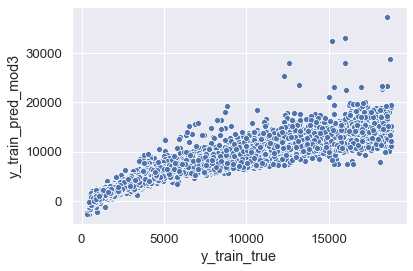

In [95]:
sns.scatterplot(data=h, x= 'y_train_true', y= 'y_train_pred_mod3')

In [96]:
# Ridge Model

from sklearn.linear_model import Ridge

In [97]:
model4 = Ridge(alpha=10, tol=0.0001, max_iter=100)
model4.fit(X_train, train_labels)

Ridge(alpha=10, max_iter=100, tol=0.0001)

In [98]:
coeff_mod4 = pd.DataFrame(model4.coef_, columns= X_train.columns, index = ['coeff']).T
coeff_mod4

,coeff
carat,10556.087958
cut,160.984541
color,-579.808511
clarity,-1232.858644
depth,-121.059094
table,-57.601171
x,-805.095273
y,16.150455
z,-38.386730


In [99]:
model4.score(X_train, train_labels)

0.9061319024436579

In [100]:
model4.score(X_test, test_labels)

0.8982318891737651

In [101]:
np.sqrt(mean_squared_error(train_labels, model4.predict(X_train)))

1221.2279600363613

In [102]:
np.sqrt(mean_squared_error(test_labels, model4.predict(X_test)))

1310.6501141820684

In [103]:
print('price =', end= ' ')
for i, j in np.array(np.array(ols_model.params.reset_index())):
        print('({}) * {} +' .format(round(j,2),i), end= ' ')

price = (14449.49) * Intercept + (11188.77) * carat + (160.6) * cut + (-588.09) * color + (-1229.15) * clarity + (-132.81) * depth + (-58.47) * table + (-1064.76) * x + (14.45) * y + (-37.76) * z + 

In [104]:
print('price =', end= ' ')
for i, j in np.array(np.array(model3.params.reset_index())):
        print('({}) * {} +' .format(round(j,2),i), end= ' ')

price = (14589.77) * Intercept + (11188.91) * carat + (160.76) * cut + (-588.0) * color + (-1229.13) * clarity + (-135.1) * depth + (-58.44) * table + (-1073.63) * x + 

In [105]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [106]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif

,VIF Factor,features
0,79.600063,carat
1,2.997262,cut
2,2.719337,color
3,4.197181,clarity
4,505.648892,depth
5,506.457631,table
6,958.089771,x
7,246.313870,y
8,278.381564,z


## 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

We had a business problem to predict the price of the stone and provide insights for the company on the profits on different prize slots. From the EDA analysis we could understand the cut, ideal cut had number profits to the company. The colours H, I, J have bought profits for the company. In clarity if we could see there were no flawless stones and they were no profits coming from l1, l2, l3 stones. The ideal, premium and very good types of cut were bringing profits where as fair and good are not bringing profits. 
The predictions were able to capture 95% variations in the price and it is explained by the predictors in the training set. 
Using stats model if we could run the model again, we can have P values and coefficients which will give us better understanding of the relationship, so that values more 0.05 we can drop those variables and re run the model again for better results. 
For better accuracy dropping depth column in iteration for better results. 
Recommendations  
1.	The ideal, premium, very good cut types are the one which are bringing profits so that we could use marketing for these to bring in more profits. 
2.	The clarity of the diamond is the next important attributes the more the clear is the stone the profits are more


# Problem 2: Logistic Regression and LDA

You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

Dataset for Problem 2: Holiday_Package.csv

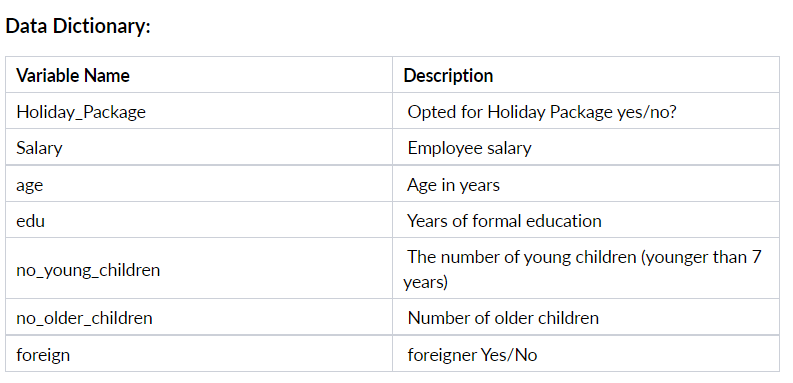

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from warnings import filterwarnings
filterwarnings('ignore')

In [108]:
holiday = pd.read_csv('Holiday_Package.csv') #Reading the data
holiday

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no
...,...,...,...,...,...,...,...,...
867,868,no,40030,24,4,2,1,yes
868,869,yes,32137,48,8,0,0,yes
869,870,no,25178,24,6,2,0,yes
870,871,yes,55958,41,10,0,1,yes


In [109]:
holiday.drop('Unnamed: 0', axis=1, inplace=True)

In [110]:
holiday.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [111]:
holiday.tail()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
867,no,40030,24,4,2,1,yes
868,yes,32137,48,8,0,0,yes
869,no,25178,24,6,2,0,yes
870,yes,55958,41,10,0,1,yes
871,no,74659,51,10,0,0,yes


In [112]:
holiday.shape

(872, 7)

In [113]:
holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [114]:
holiday.describe(include ='all').T # data description

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872.0,NaN,NaN,NaN,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,NaN,NaN,NaN,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,NaN,NaN,NaN,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,NaN,NaN,NaN,0.311927,0.61287,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,NaN,NaN,NaN,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
holiday.isnull().sum() #null value check

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

No, null values in the data.

In [116]:
# Checking duplicates

dups = holiday.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [117]:
# unique values for categorical variables

for column in holiday.columns:
    if holiday[column].dtype == 'object':
        print(column.upper(),': ',holiday[column].nunique())
        print(holiday[column].value_counts().sort_values())
        print('\n')

HOLLIDAY_PACKAGE :  2
yes    401
no     471
Name: Holliday_Package, dtype: int64


FOREIGN :  2
yes    216
no     656
Name: foreign, dtype: int64




In [118]:
holiday.Holliday_Package.value_counts(1)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

### Univariate & Bivariate Analysis

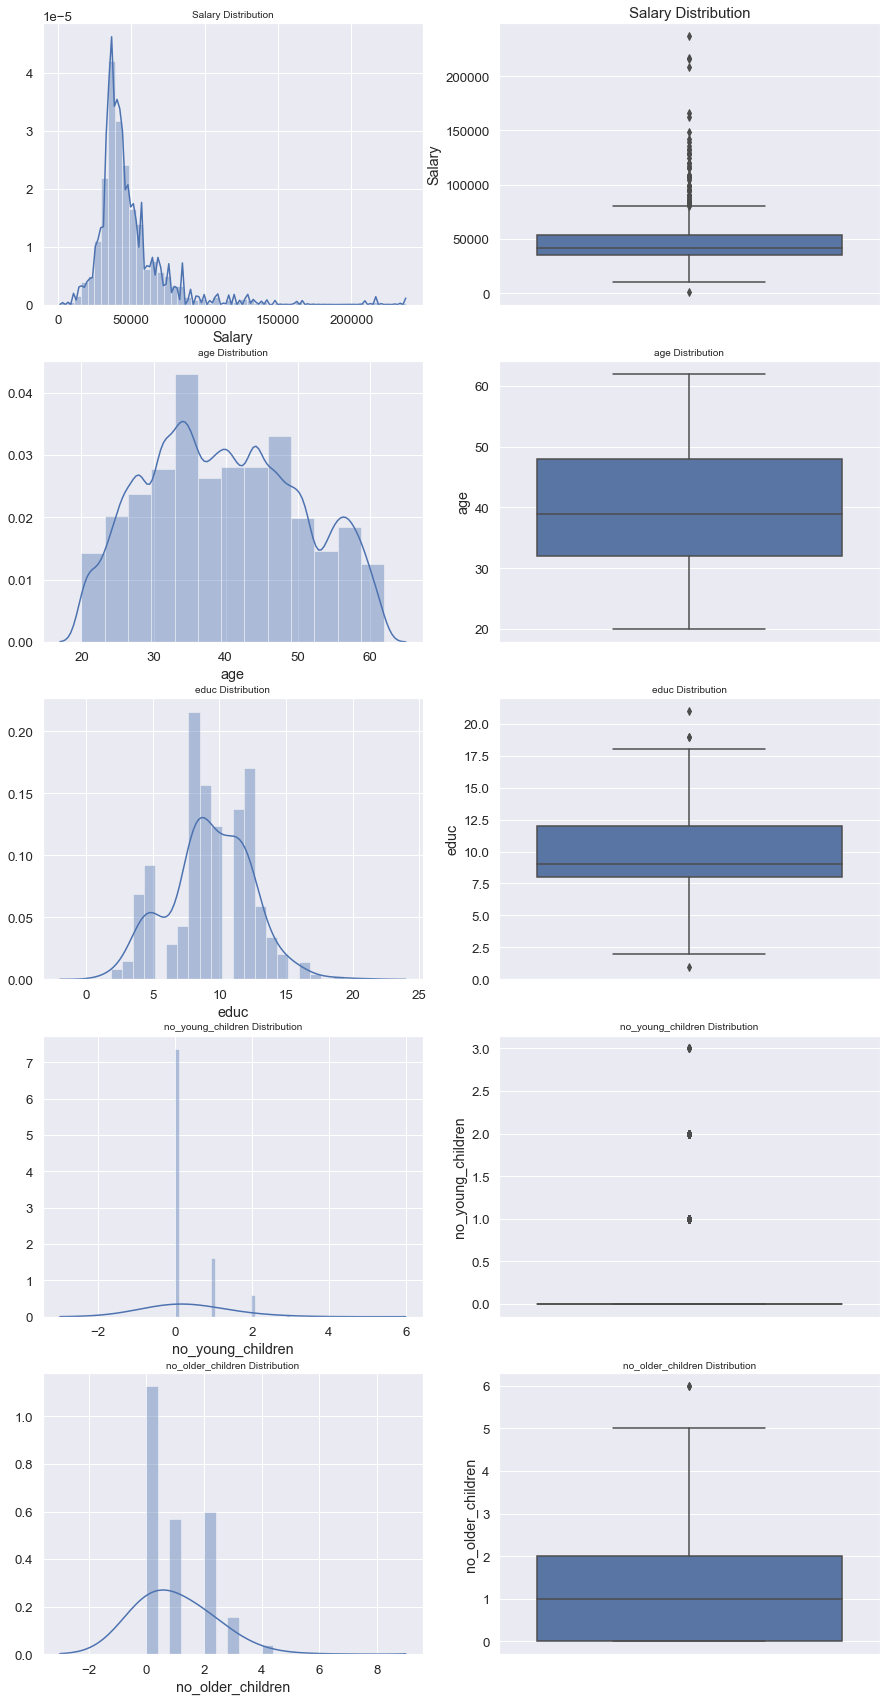

In [119]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(15, 30)

a = sns.distplot(holiday['Salary'], kde_kws = {'bw' : 1}, ax=axes[0][0])
a.set_title("Salary Distribution",fontsize=10)

a = sns.boxplot(holiday['Salary'] , orient = "v" , ax=axes[0][1])
a.set_title("Salary Distribution",fontsize=15)

a = sns.distplot(holiday['age'], kde_kws = {'bw' : 1}, ax=axes[1][0])
a.set_title("age Distribution",fontsize=10)

a = sns.boxplot(holiday['age'] , orient = "v" , ax=axes[1][1])
a.set_title("age Distribution",fontsize=10)

a = sns.distplot(holiday['educ'],  kde_kws = {'bw' : 1}, ax=axes[2][0])
a.set_title("educ Distribution",fontsize=10)

a = sns.boxplot(holiday['educ'] , orient = "v" , ax=axes[2][1])
a.set_title("educ Distribution",fontsize=10)

a = sns.distplot(holiday['no_young_children'],  kde_kws = {'bw' : 1}, ax=axes[3][0])
a.set_title("no_young_children Distribution",fontsize=10)

a = sns.boxplot(holiday['no_young_children'] , orient = "v" , ax=axes[3][1])
a.set_title("no_young_children Distribution",fontsize=10)

a = sns.distplot(holiday['no_older_children'], kde_kws = {'bw' : 1}, ax=axes[4][0])
a.set_title("no_older_children Distribution",fontsize=10)

a = sns.boxplot(holiday['no_older_children'] , orient = "v" , ax=axes[4][1])
a.set_title("no_older_children Distribution",fontsize=10)
plt.savefig('Univariate Analysis_H')

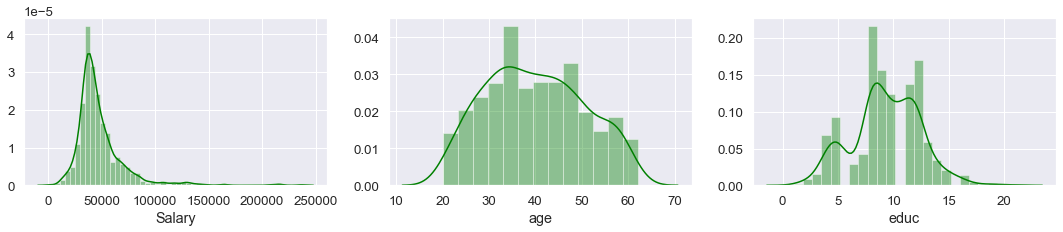

In [120]:
plt.figure(figsize=(15,6))
for i,col in enumerate(holiday.select_dtypes(exclude='object').columns[:-2]):
    plt.subplot(2,3, i+1)
    sns.distplot(holiday[col], color='green')
    plt.tight_layout()
    

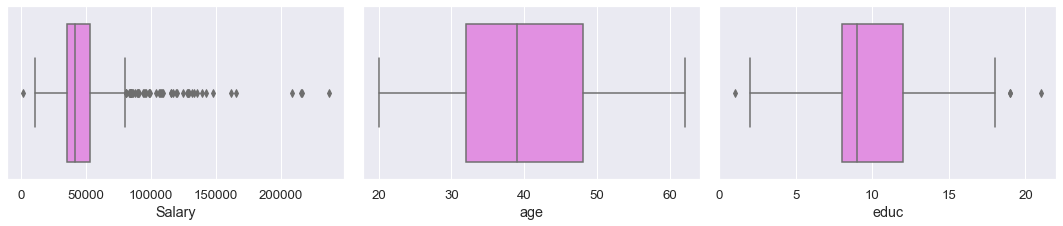

In [121]:
plt.figure(figsize=(15,6))
for i,col in enumerate(holiday.select_dtypes(exclude='object').columns[:-2]):
    plt.subplot(2,3, i+1)
    sns.boxplot(holiday[col], color= 'violet')
    plt.tight_layout()

In [122]:
holiday.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

In [123]:
holiday.skew()

Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

<AxesSubplot:xlabel='foreign', ylabel='count'>

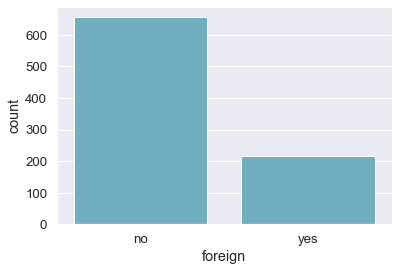

In [124]:
# Categorical variables

sns.countplot(x="foreign", data=holiday, color="c")


<AxesSubplot:xlabel='Holliday_Package', ylabel='count'>

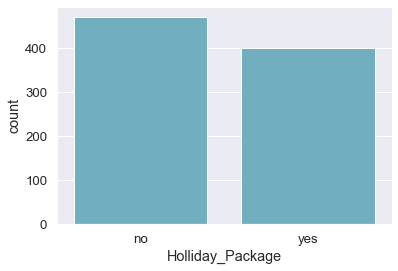

In [125]:
sns.countplot(x="Holliday_Package", data=holiday, color="c")


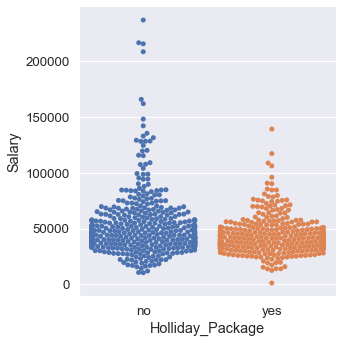

In [126]:
sns.catplot(x="Holliday_Package", y="Salary",kind="swarm",data=holiday)

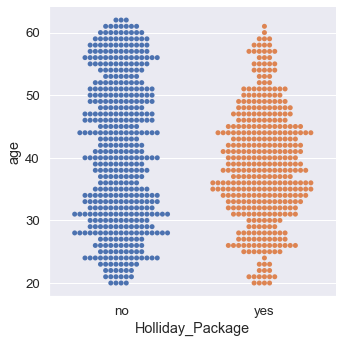

In [127]:
sns.catplot(x="Holliday_Package", y="age",kind="swarm",data=holiday)

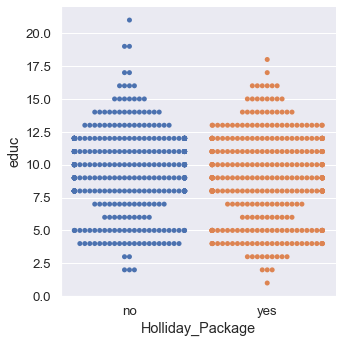

In [128]:
sns.catplot(x="Holliday_Package", y="educ",kind="swarm",data=holiday)

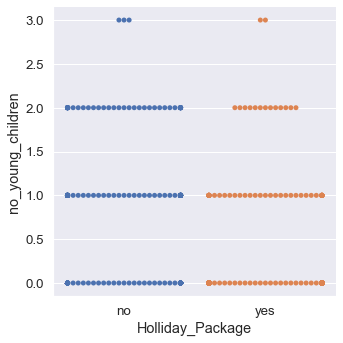

In [129]:
sns.catplot(x="Holliday_Package", y="no_young_children",kind="swarm",data=holiday)

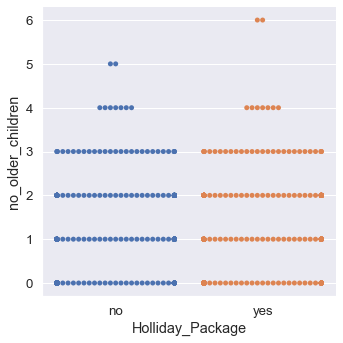

In [130]:
sns.catplot(x="Holliday_Package", y="no_older_children",kind="swarm",data=holiday)

<AxesSubplot:xlabel='age', ylabel='Salary'>

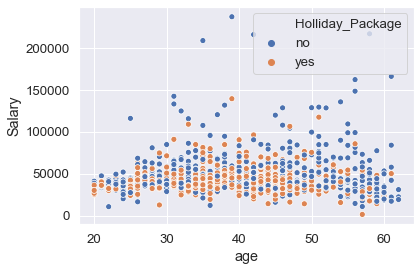

In [131]:
sns.scatterplot(data = holiday, x='age',y='Salary', hue = 'Holliday_Package')

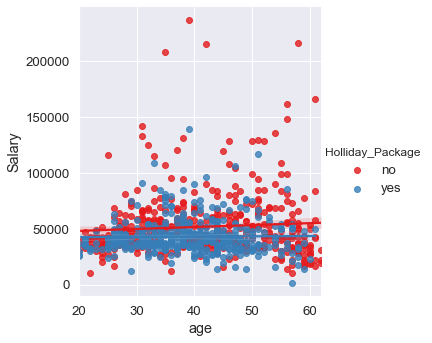

In [132]:
sns.lmplot(x="age", y="Salary", hue="Holliday_Package", data=holiday,
               palette="Set1")

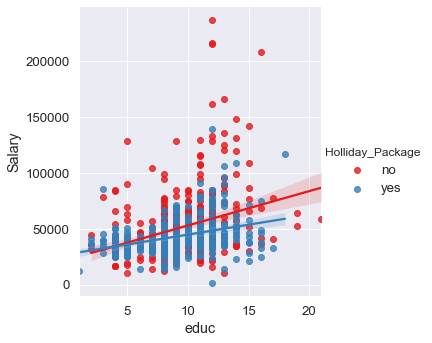

In [133]:
sns.lmplot(x="educ", y="Salary", hue="Holliday_Package", data=holiday,
               palette="Set1")

<AxesSubplot:xlabel='educ', ylabel='Salary'>

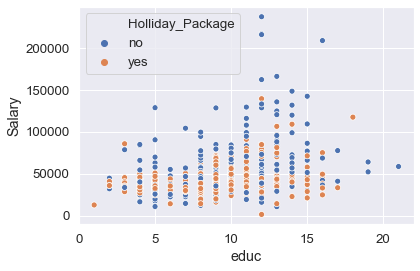

In [134]:
sns.scatterplot(data = holiday, x='educ',y='Salary', hue = 'Holliday_Package')

<AxesSubplot:xlabel='Holliday_Package', ylabel='Salary'>

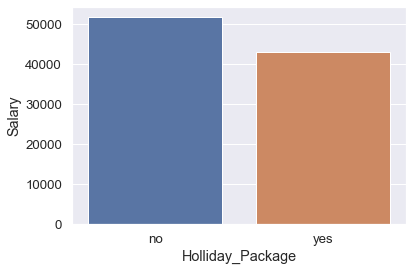

In [135]:
sns.barplot(data=holiday, x = 'Holliday_Package', y = 'Salary', ci=0, estimator= np.mean)

In [136]:
holiday.Holliday_Package.value_counts(normalize=True)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

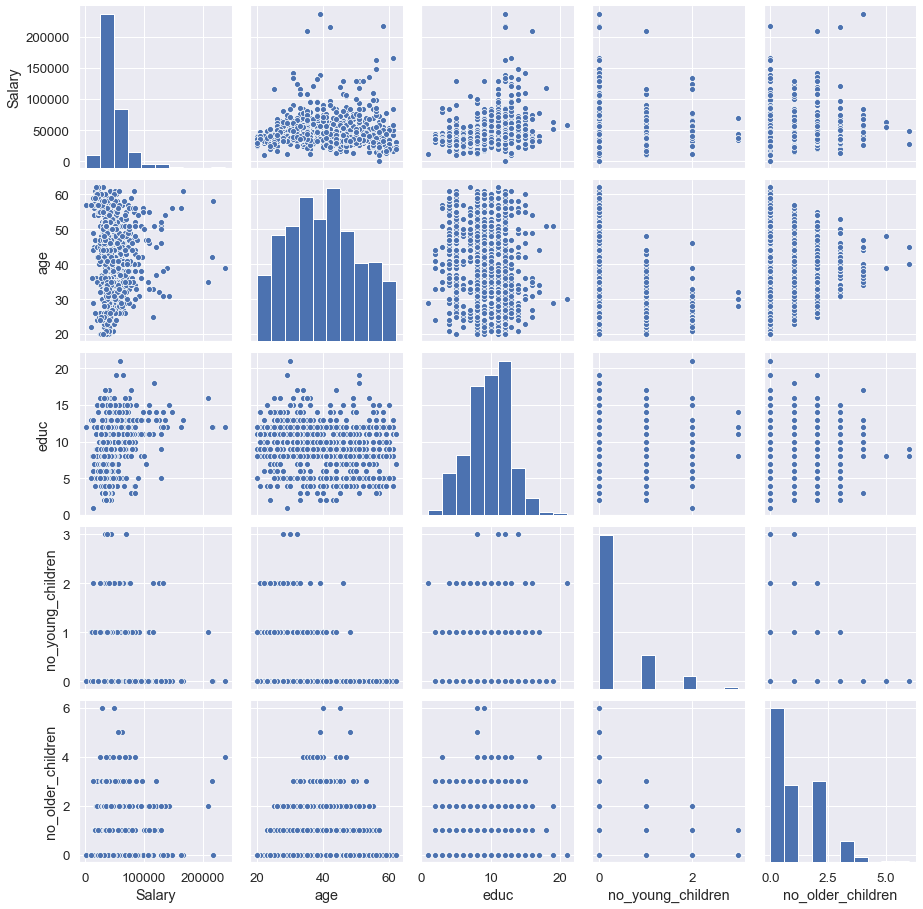

In [137]:
sns.pairplot(holiday)

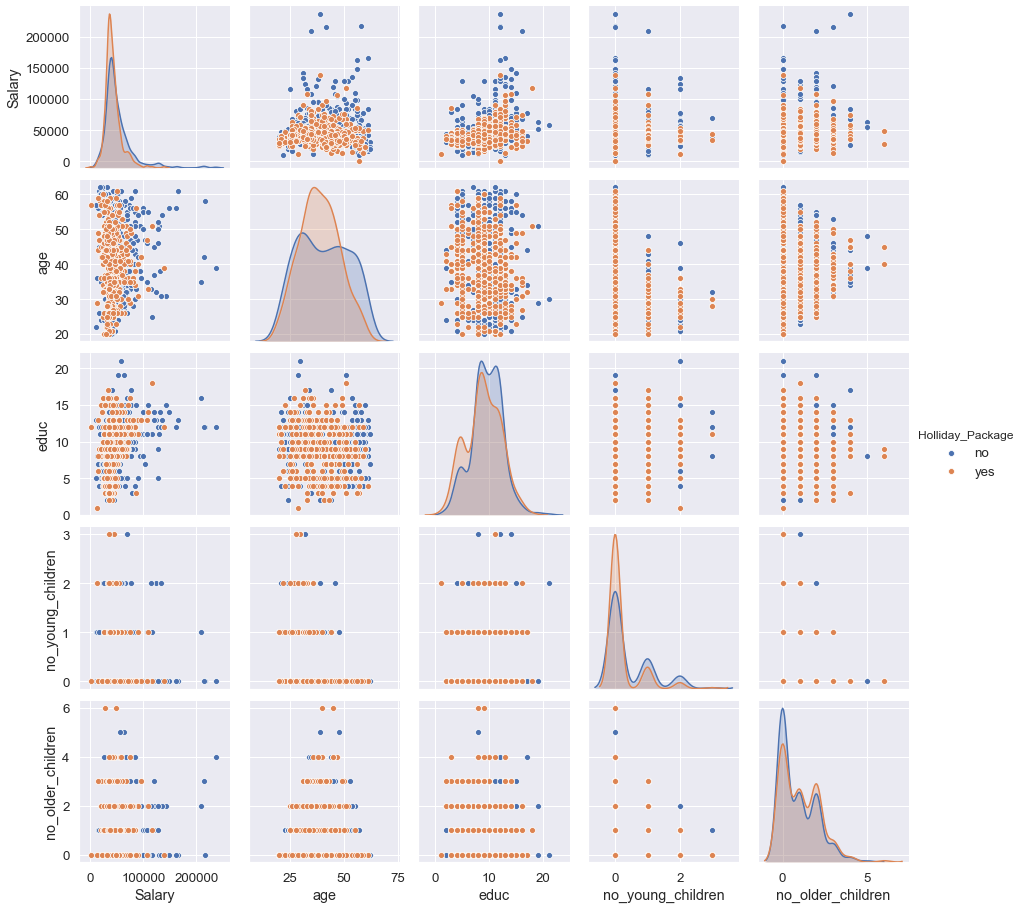

In [139]:
sns.pairplot(holiday ,diag_kind='kde' ,hue='Holliday_Package');
plt.savefig('pairplot')

<AxesSubplot:>

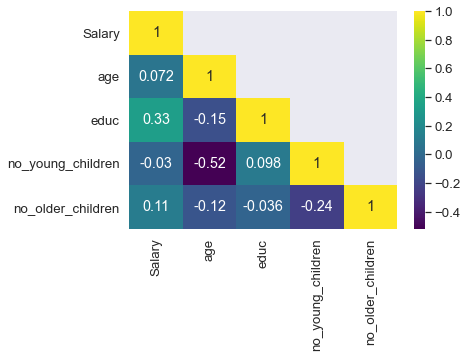

In [140]:
holiday_cor = holiday.corr()
msk = np.triu(holiday_cor, +1)
sns.heatmap(holiday_cor, mask=msk, annot=True, cmap='viridis')

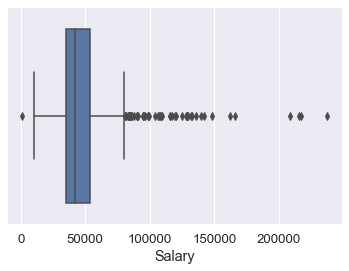

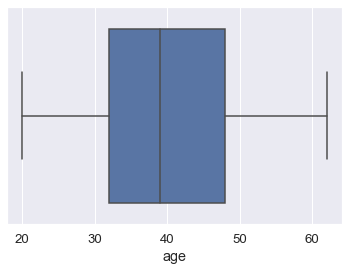

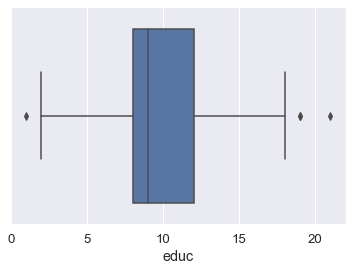

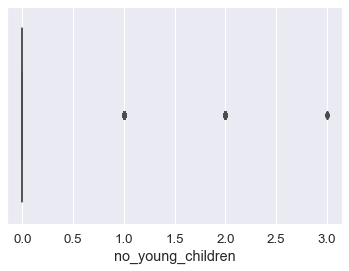

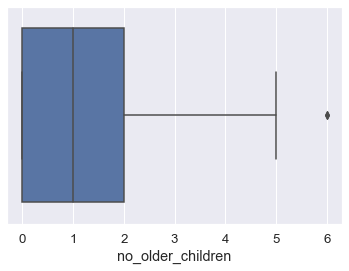

<Figure size 432x288 with 0 Axes>

In [141]:
cols = ['Salary' ,'age', 'educ', 'no_young_children', 'no_older_children']

for i in cols:
    sns.boxplot(holiday[i])
    plt.show()
plt.savefig('before treating outliers')

In [142]:
#Treating Outliers

cont=holiday.dtypes[(holiday.dtypes!='uint8') & (holiday.dtypes!='object')].index

In [143]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range



In [144]:
for column in holiday[cont].columns:
    lr,ur=remove_outlier(holiday[column])
    holiday[column]=np.where(holiday[column]>ur,ur,holiday[column])
    holiday[column]=np.where(holiday[column]<lr,lr,holiday[column])

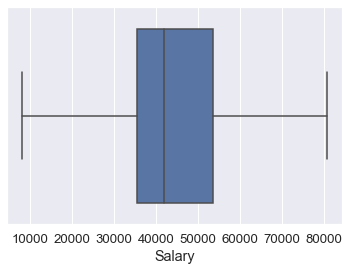

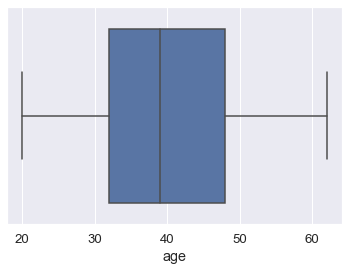

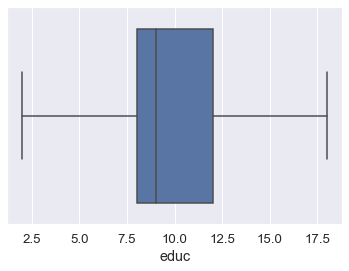

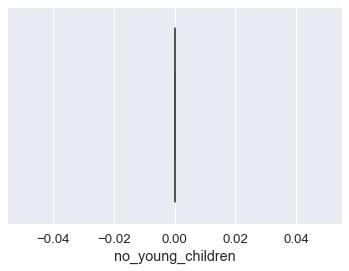

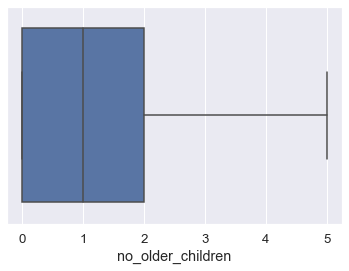

<Figure size 432x288 with 0 Axes>

In [145]:
cols = ['Salary' ,'age', 'educ', 'no_young_children', 'no_older_children']

for i in cols:
    sns.boxplot(holiday[i])
    plt.show()
plt.savefig('after treating outliers')

In [146]:
holiday.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412.0,30.0,8.0,0.0,1.0,no
1,yes,37207.0,45.0,8.0,0.0,1.0,no
2,no,58022.0,46.0,9.0,0.0,0.0,no
3,no,66503.0,31.0,11.0,0.0,0.0,no
4,no,66734.0,44.0,12.0,0.0,2.0,no


In [147]:
df1 = holiday.copy()

In [148]:
df2 = df1.copy()

## 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [ ]:
# Converting categorical to dummy variables in data

In [149]:
data = pd.get_dummies(df2, columns=['Holliday_Package','foreign'], drop_first = True)

In [150]:
data.head()

,Salary,age,educ,no_young_children,no_older_children,Holliday_Package_yes,foreign_yes
0,48412.0,30.0,8.0,0.0,1.0,0,0
1,37207.0,45.0,8.0,0.0,1.0,1,0
2,58022.0,46.0,9.0,0.0,0.0,0,0
3,66503.0,31.0,11.0,0.0,0.0,0,0
4,66734.0,44.0,12.0,0.0,2.0,0,0


In [151]:
data.columns

Index(['Salary', 'age', 'educ', 'no_young_children', 'no_older_children',
       'Holliday_Package_yes', 'foreign_yes'],
      dtype='object')

#### Train/Test Split

In [152]:
# Copy all the predictor variables into X dataframe
X = data.drop('Holliday_Package_yes', axis=1)

# Copy target into the y dataframe. 
y = data['Holliday_Package_yes']

In [153]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [154]:
y_train.value_counts(1)

0    0.539344
1    0.460656
Name: Holliday_Package_yes, dtype: float64

In [155]:
train_labels.value_counts(normalize=True)

price
544      0.003074
552      0.002597
828      0.002544
776      0.002491
802      0.002385
           ...   
5962     0.000053
5963     0.000053
5969     0.000053
5973     0.000053
18804    0.000053
Length: 7296, dtype: float64

In [156]:
test_labels.value_counts(normalize=True)

price
789      0.002967
625      0.002720
720      0.002596
698      0.002596
945      0.002473
           ...   
4101     0.000124
4106     0.000124
4107     0.000124
4108     0.000124
18818    0.000124
Length: 4477, dtype: float64

In [157]:
# Applying GridSearchCV for Logistic Regression

grid={'penalty':['l1','l2','none'],
      'solver':['lbfgs', 'liblinear'],
      'tol':[0.0001,0.000001]}

In [158]:
model = LogisticRegression(max_iter=100000,n_jobs=2)

In [159]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [160]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=100000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['lbfgs', 'liblinear'],
                         'tol': [0.0001, 1e-06]},
             scoring='f1')

In [161]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'liblinear', 'tol': 1e-06} 

LogisticRegression(max_iter=100000, n_jobs=2, solver='liblinear', tol=1e-06)


In [162]:
best_model = grid_search.best_estimator_

In [163]:
best_model

LogisticRegression(max_iter=100000, n_jobs=2, solver='liblinear', tol=1e-06)

## 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

In [164]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [165]:
ytrain_predict

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [166]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()


,0,1
0,0.636523,0.363477
1,0.576651,0.423349
2,0.650835,0.349165
3,0.568064,0.431936
4,0.536356,0.463644


              precision    recall  f1-score   support

           0       0.63      0.79      0.70       329
           1       0.65      0.45      0.53       281

    accuracy                           0.63       610
   macro avg       0.64      0.62      0.62       610
weighted avg       0.64      0.63      0.62       610
 



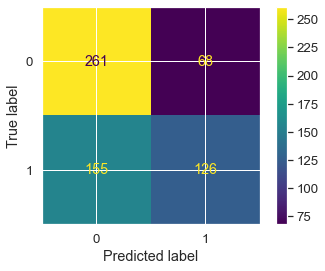

In [167]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');


              precision    recall  f1-score   support

           0       0.64      0.83      0.72       142
           1       0.69      0.45      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.63       262
weighted avg       0.66      0.66      0.64       262
 



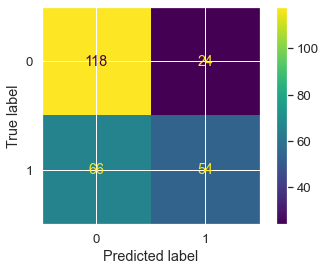

In [168]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');


In [169]:
# Accuracy - Training Data

lr_train_acc = best_model.score(X_train, y_train)
lr_train_acc

0.6344262295081967

In [ ]:
# AUC and ROC for the training data

AUC: 0.661


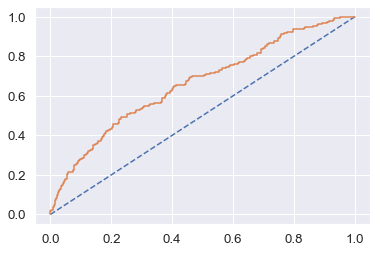

In [170]:

# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [171]:
# Accuracy - Test Data

lr_test_acc = best_model.score(X_test, y_test)
lr_test_acc

0.6564885496183206

AUC: 0.675


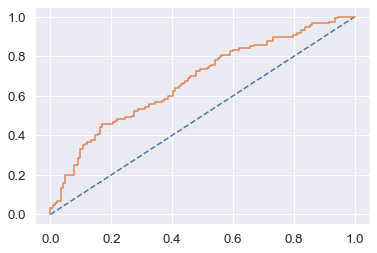

In [172]:
# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [173]:
lr_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_train_f1=round(df.loc["1"][2],2)
lr_train_recall=round(df.loc["1"][1],2)
lr_train_precision=round(df.loc["1"][0],2)
print ('lr_train_precision ',lr_train_precision)
print ('lr_train_recall ',lr_train_recall)
print ('lr_train_f1 ',lr_train_f1)

lr_train_precision  0.65
lr_train_recall  0.45
lr_train_f1  0.53


In [174]:
lr_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_test_f1=round(df.loc["1"][2],2)
lr_test_recall=round(df.loc["1"][1],2)
lr_test_precision=round(df.loc["1"][0],2)
print ('lr_test_precision ',lr_test_precision)
print ('lr_test_recall ',lr_test_recall)
print ('lr_test_f1 ',lr_test_f1)

lr_test_precision  0.69
lr_test_recall  0.45
lr_test_f1  0.55


## LDA

In [175]:
df1.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412.0,30.0,8.0,0.0,1.0,no
1,yes,37207.0,45.0,8.0,0.0,1.0,no
2,no,58022.0,46.0,9.0,0.0,0.0,no
3,no,66503.0,31.0,11.0,0.0,0.0,no
4,no,66734.0,44.0,12.0,0.0,2.0,no


In [176]:
df1.shape

(872, 7)

In [177]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holliday_Package   872 non-null    object 
 1   Salary             872 non-null    float64
 2   age                872 non-null    float64
 3   educ               872 non-null    float64
 4   no_young_children  872 non-null    float64
 5   no_older_children  872 non-null    float64
 6   foreign            872 non-null    object 
dtypes: float64(5), object(2)
memory usage: 47.8+ KB


In [178]:
for feature in df1.columns: 
    if df1[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df1[feature].unique()))
        print(pd.Categorical(df1[feature].unique()).codes)
        df1[feature] = pd.Categorical(df1[feature]).codes



feature: Holliday_Package
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


feature: foreign
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


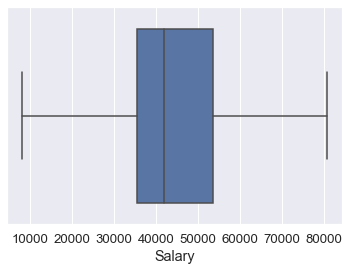

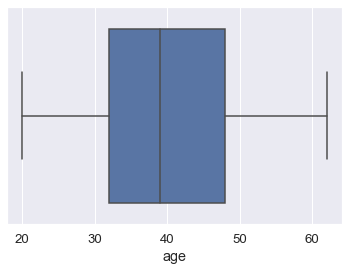

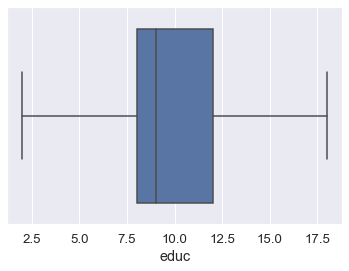

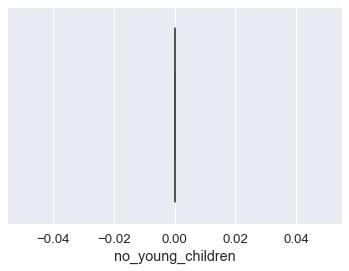

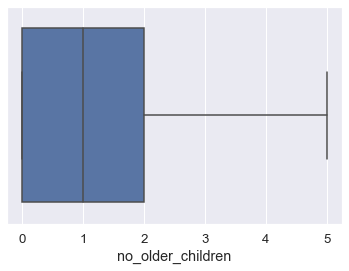

In [179]:
cols = ['Salary' ,'age', 'educ', 'no_young_children', 'no_older_children']

for i in cols:
    sns.boxplot(df1[i])
    plt.show()

In [180]:
X = df1.drop('Holliday_Package',axis=1)
Y = df1.pop('Holliday_Package')

In [181]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.30,random_state=1,stratify = Y)

In [182]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

In [183]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

In [184]:
pred_class_test

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int8)

In [185]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [186]:
lda_train_acc = model.score(X_train,Y_train)
lda_train_acc

0.6327868852459017

In [187]:
print(classification_report(Y_train, pred_class_train))

              precision    recall  f1-score   support

           0       0.62      0.80      0.70       329
           1       0.65      0.44      0.52       281

    accuracy                           0.63       610
   macro avg       0.64      0.62      0.61       610
weighted avg       0.64      0.63      0.62       610



In [188]:
confusion_matrix(Y_train, pred_class_train)

array([[263,  66],
       [158, 123]], dtype=int64)

In [189]:
lda_test_acc = model.score(X_test,Y_test)
lda_test_acc

0.6564885496183206

In [190]:
print(classification_report(Y_test, pred_class_test))

              precision    recall  f1-score   support

           0       0.64      0.83      0.72       142
           1       0.69      0.45      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.63       262
weighted avg       0.66      0.66      0.64       262



In [191]:
confusion_matrix(Y_test, pred_class_test)

array([[118,  24],
       [ 66,  54]], dtype=int64)

0.1 

Accuracy Score 0.4607
F1 Score 0.6308 

Confusion Matrix


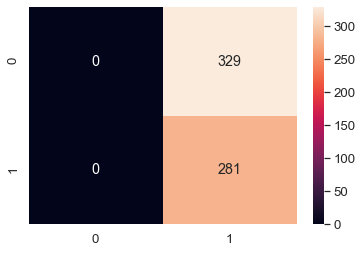

0.2 

Accuracy Score 0.4738
F1 Score 0.6365 

Confusion Matrix


<Figure size 432x288 with 0 Axes>

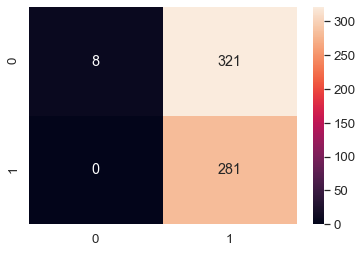

0.3 

Accuracy Score 0.5344
F1 Score 0.6485 

Confusion Matrix


<Figure size 432x288 with 0 Axes>

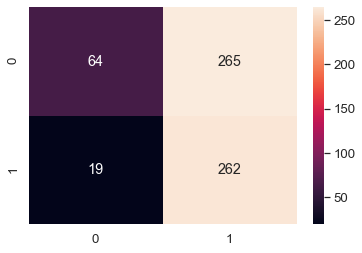

0.4 

Accuracy Score 0.5787
F1 Score 0.6088 

Confusion Matrix


<Figure size 432x288 with 0 Axes>

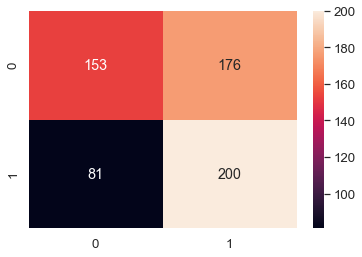

0.5 

Accuracy Score 0.6328
F1 Score 0.5234 

Confusion Matrix


<Figure size 432x288 with 0 Axes>

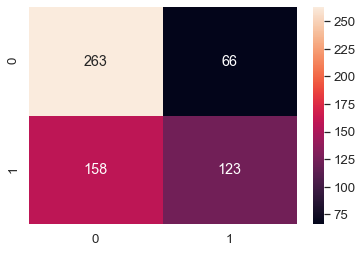

0.6 

Accuracy Score 0.6213
F1 Score 0.446 

Confusion Matrix


<Figure size 432x288 with 0 Axes>

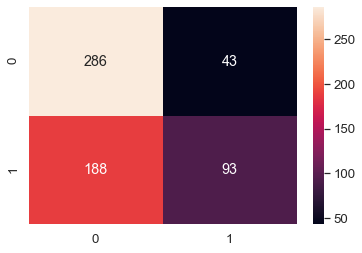

0.7 

Accuracy Score 0.5869
F1 Score 0.2455 

Confusion Matrix


<Figure size 432x288 with 0 Axes>

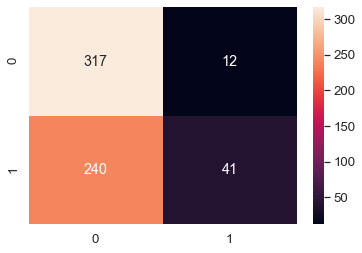

0.8 

Accuracy Score 0.541
F1 Score 0.0071 

Confusion Matrix


<Figure size 432x288 with 0 Axes>

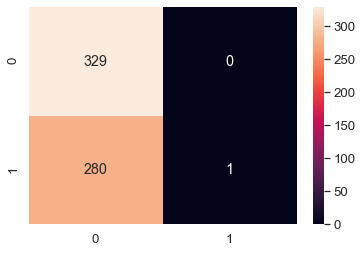

0.9 

Accuracy Score 0.5393
F1 Score 0.0 

Confusion Matrix


<Figure size 432x288 with 0 Axes>

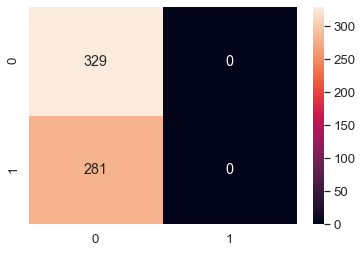

<Figure size 432x288 with 0 Axes>

In [193]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(Y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(Y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(Y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(Y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();
    plt.savefig('jhfytfhgv')

AUC for the Training Data: 0.661
AUC for the Test Data: 0.675


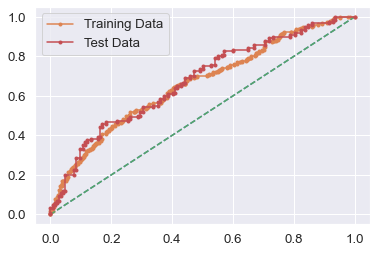

In [194]:
# AUC and ROC for the training data

# calculate AUC
lda_train_auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % lda_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
lda_test_auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % lda_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [195]:
lda_metrics=classification_report(Y_train, pred_class_train,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lr_train_f1)

lda_train_precision  0.65
lda_train_recall  0.44
lda_train_f1  0.53


In [196]:
lda_metrics=classification_report(Y_test, pred_class_test,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_f1=round(df.loc["1"][2],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_precision=round(df.loc["1"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.69
lda_test_recall  0.45
lda_test_f1  0.55


In [197]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
        'LR Test':[lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1],
       'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],},index=index)
round(data,2)


,LR Train,LR Test,LDA Train,LDA Test
Accuracy,0.63,0.66,0.63,0.66
AUC,0.66,0.68,0.66,0.68
Recall,0.45,0.45,0.44,0.45
Precision,0.65,0.69,0.65,0.69
F1 Score,0.53,0.55,0.52,0.55


## 2.4 Inference: Basis on these predictions, what are the insights and recommendations.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

We had a business problem where we need predict whether an employee would opt for a holiday package or not, for this problem we had done predictions both logistic regression and linear discriminant analysis. Since both are results are same.  
The EDA analysis clearly indicates certain criteria where we could find people aged above 50 are not interested much in holiday packages. 
Hence, this is one of the we find aged people not opting for holiday packages. 

People ranging from the age 30 to 50 generally opt for holiday packages.  Employee age over 50 to 60 have seems to be not taking the holiday package, whereas in the age 30 to 50 and salary less than 50000 people have opted more for holiday package. 
 
The important factors deciding the predictions are salary, age and educ. 
 
Recommendations:

To improve holiday packages over the age above 50 we can provide religious destination places. 

For people earning more than 150000 we can provide vacation holiday packages. 

For employee having more than number of older children we can provide packages in holiday vacation places. 
 



# THE END!